In [77]:
include("myfuncs.jl")
using Images

In [14]:
# test psf adj

function test_adj(h, ht; n = 1000)
    err = Float64[]
    for k in 1:n
        x, y = rand(size(h)...), rand(size(h)...)
        push!(err, (dot(imfilter(x, h), y) - dot(x, imfilter(y, ht)))^2)
    end   
    sum(err)/n
end

h = [exp(-(k^2 + l^2)/30) for k in -100:101, l in -100:101]
@show test_adj(h, adj(h))

test_adj(h, adj(h)) = 1.2597860038141007e-17


1.2597860038141007e-17

In [81]:
# test WT adj

function test_adj_wavelets(n_sky, spatialwlt; n = 1000)
    err = Float64[]
    for k in 1:n
        x = rand(n_sky, n_sky) 
        α = rand(n_sky, n_sky, length(spatialwlt))
        push!(err, (dot(mydwt(x, spatialwlt), α) - dot(x, myidwt(α, spatialwlt)))^2)
    end   
    sum(err)/n

end

spatialwlt = [WT.db1, WT.db2, WT.db3, WT.db4, WT.db5, WT.db6, WT.db7, WT.db8]
test_adj_wavelets(32, spatialwlt; n=10)

1.0896914337052341e-25

In [ ]:
# test PSF

psf = H
z = fft(ifftshift(psf))
println("Imag. part: ", extrema(imag(z)))
println("Real. part: ", extrema(real(z)))
p1 = imshow(fftshift(real.(z)))
p2 = plot(psf[:, 128])
plot(p1, p2)

Computing... 100%|███████████████████████████████████████| Time: 0:00:04


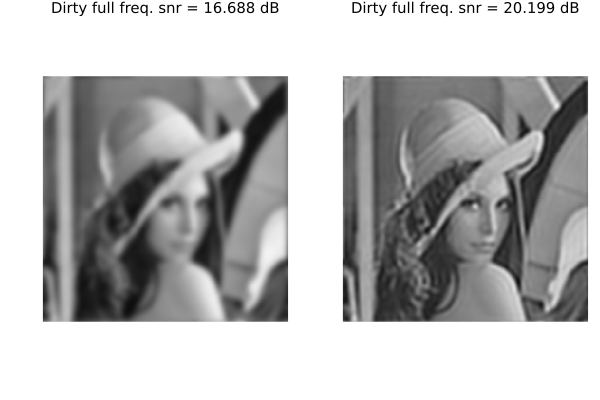

In [36]:
# test deconv

sky = Float64.(read(FITS("lena.fits")[1]))
sky /= maximum(sky)
n_sky,  = size(sky)

psf = [exp(-(n1^2 + n2^2)/(2*10)) for n1 in -(n_sky-1)/2:(n_sky-1)/2, n2 in -(n_sky-1)/2:(n_sky-1)/2]
psf /= sum(psf)

i = imfilter(sky, psf) #+ 1e-3*randn(size(sky))
p1 = imshow(i, title = "Dirty full freq. snr = $(snr(sky,i)) dB")

spatialwlt = [WT.db1, WT.db2, WT.db3, WT.db4, WT.db5, WT.db6, WT.db7, WT.db8]

η = compute_step(psf)
iₑ = fista(100, η, 1e-4, psf, i)
p2 = imshow(iₑ, title = "Dirty full freq. snr = $(snr(sky,iₑ)) dB")

plot(p1, p2)